# **Climate Change Tweet Classification**

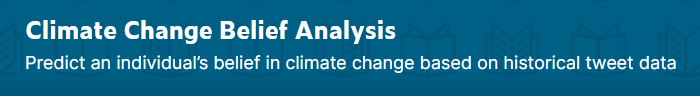

# **Introduction**

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

# **Problem statement** 

# **Import Libraries**

In [15]:
# Data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Natural language and text processing
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Data Collection**

In [16]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [17]:
#Below cells contain the first 5 and last 5 entries of our dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Our dataset contains more that 15 thousands entries, split into 3 columns. 

In [19]:
#
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


# **Data Cleaning**

We have imported our dataset, found a little information and described the sentiment. In this section, we will be getting deeper into out data and cleaning it for further use in the next section.

In [20]:
#Checking for missing values
print(f'Missing values in train dataset:\n{df_train.isna().sum()}\n')
print(f'Missing values in test dataset:\n{df_test.isna().sum()}')

Missing values in train dataset:
sentiment    0
message      0
tweetid      0
dtype: int64

Missing values in test dataset:
message    0
tweetid    0
dtype: int64


The good news is that both of our datasets contain no missing values.
In the next cell we will select one column for further analysis for both train and test datasets.

In [21]:
#Column selection for further analysis
text1 = df_train[['message']]
text1.head()

,message
0,PolySciMajor EPA chief doesn't think carbon di...
1,It's not like we lack evidence of anthropogeni...
2,RT @RawStory: Researchers say we have three ye...
3,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [22]:
text2 = df_test[['message']]
text2.head()

,message
0,Europe will now be looking to China to make su...
1,Combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...
4,RT @FakeWillMoore: 'Female orgasms cause globa...


### Lowercase
 
 It is important to ensure that all our text have one case, that is the lowercasing. 

In [23]:
#Conversion of all uppercases to lowercases
df_train['message'] = df_train['message'].str.lower()
df_train.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt @rawstory: researchers say we have three ye...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954


In [24]:
df_test['message'] = df_test['message'].str.lower()
df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263
4,rt @fakewillmoore: 'female orgasms cause globa...,872928


### Number of Words

Below it's a code for counting all individual words found in each tweet sentence. The count will include contractions as well.

In [25]:
#Count of words per tweet sentence
df_train["num_words"] = df_train["message"].apply(lambda x: len(str(x).split()))
df_train.head()

,sentiment,message,tweetid,num_words
0,1,polyscimajor epa chief doesn't think carbon di...,625221,19
1,1,it's not like we lack evidence of anthropogeni...,126103,10
2,2,rt @rawstory: researchers say we have three ye...,698562,19
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,15
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,18


In [26]:
df_test["num_words"] = df_test["message"].apply(lambda x: len(str(x).split()))
df_test.head()

,message,tweetid,num_words
0,europe will now be looking to china to make su...,169760,20
1,combine this with the polling of staffers re c...,35326,20
2,"the scary, unimpeachable evidence that climate...",224985,14
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,23
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,9


## Tokenization

In [27]:
#Tokenization of the sentence
def tokenizer (tweet):
    tweet = re.split('\W+', tweet)
    return tweet

df_train['tokenized'] = df_train['num_words'].apply(lambda x: tokenizer (x))
df_train.head()


TypeError: ignored

In [ ]:
def tokenizer (tweet):
    tweet = re.split('\W+', tweet)
    return tweet

df_test['tokenized'] = df_test['num_words'].apply(lambda x: tokenizer (x))
df_test.head()


## Exploratory Data Analysis

There are more than 15000 entries in our dataset. Below is the count and distribution of our respective sentiments. Since our dataset contains no missing values, we consider this count accurate.
According to class distribution, the data is skewed towards the positive comments represented by 1. 

In [32]:
df_train.value_counts('sentiment')

sentiment
 1    8530
 2    3640
 0    2353
-1    1296
dtype: int64

Text(0.5, 1.0, 'Class')

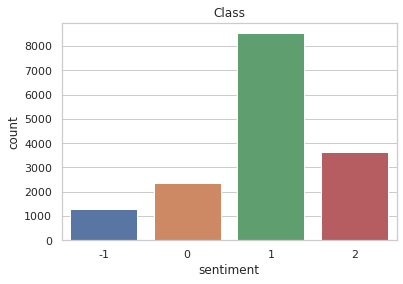

In [45]:
sns.set(style="whitegrid")
sns.countplot(x='sentiment', data=df_train)
plt.title('Class')

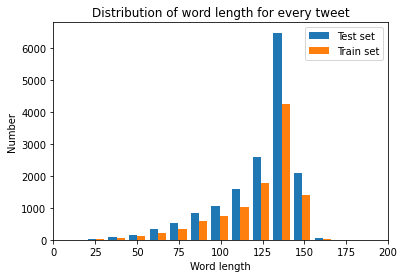

In [44]:
df_train['length'] = df_train['message'].astype(str).apply(len)
df_train['num_words'] = df_train['message'].apply(lambda x: len(str(x).split()))
df_test['length'] = df_test['message'].astype(str).apply(len)
df_test['num_words'] = df_test['message'].apply(lambda x: len(str(x).split()))

plt.hist([df_train['length'], df_test['length']], bins=50, label = ['Test set', 'Train set'])
plt.title('Distribution of word length for every tweet')
plt.xlabel('Word length')
plt.ylabel('Number')
plt.legend()
plt.xlim([0,200])
plt.show()

## Model Building

## Model Deployment